<center><h1> Capstone: </h1><center>
    <br>
<br>
    
Daniela Martinez<br>
Data Science Student, Brainstation, 2024<br>
_______________________________________________________________________________
<h3> Wine Classification Prediction</h1>

### Table of Content
Part 0. <a href="#part-0">Overviewing and Cleaning Data</a> <br>
Part 1. <a href="#part-1">Exploratory Data Analysis</a> <br>
Part 2. <a href="#part-2">Statistical Analysis</a> <br>
Part 3. <a href="#part-3">Advanced Statistical Analysis</a> <br>

### Part 0 - Overviewing Data and Cleaning Data<a class="anchor" id="part-0"></a>

___

#### 1. Overviewing Data

#### Dataset
For this prediction two datasets are going to be used for these predictions, both are for public access.

One of them contains attributes related to Pesticides and Yield. This dataset was collected from [FAOSTAT](https://www.fao.org/faostat/en/#data/QCL)
The second dataset contains information related to Rainfall and Avg. Temperature. It was collected from the [World Data Bank](https://data.worldbank.org/indicator)





#### Data dictionary

Area: Country names that plant raw_yields<br>
Item: Types of crops planted<br>
Year: Time of planted crops in years 1990-2013<br>
average_rain_fall_mm_per_year: Average rain fall per year<br>
pesticides_tonnes: Pesticides used in tonnes per ha<br>
avg_temp: Average temperature (celsius)<br>
hg/ha_yield: Crops yield production value in hectogram per hectare (hg/Ha)

**Importing Packages**

In [58]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

#### 2. Loading data frames and Cleaning process

- 2.1 Loading dataset

In [59]:
# Importing the dataset
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
features = wine.data.features
target = wine.data.targets
  
# metadata 
print(wine.metadata) 
  
# variable information 
print(wine.variables) 


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'published_in': 'Pattern Recognition', 'year': 1994, 'url': 'https://www.semanticscholar.org/paper/83dc3e4030d7b9fbdbb4bde03ce12ab70ca10528', 'do

- 2.2 Exploring datasets

In [60]:
features.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [61]:
# basic EDA summary for target df
print(f"Total rows: {target.shape[0]}")
print(f"Total columns: {target.shape[1]}")
print(f"Null values: {target.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {target.T.duplicated()}")

Total rows: 178
Total columns: 1
Null values: 0
----------
Duplicate columns: class    False
dtype: bool


In [62]:
# basic EDA summary for features df
print(f"Total rows: {features.shape[0]}")
print(f"Total columns: {features.shape[1]}")
print(f"Null values: {features.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {features.T.duplicated()}")

Total rows: 178
Total columns: 13
Null values: 0
----------
Duplicate columns: Alcohol                         False
Malicacid                       False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
0D280_0D315_of_diluted_wines    False
Proline                         False
dtype: bool


- Generating original dataset for visualizations

In [63]:
# Concatenating datasets
wine = pd.concat([target, features], axis=1)

# Saving the merged dataset to a new CSV file
wine.to_csv('data/wine.csv', index=False)

In [64]:
wine = pd.read_csv('data/wine.csv')

In [65]:
wine.head()

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [66]:
wine.sample(10)

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
108,2,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.860,3.02,312
152,3,13.11,1.90,2.75,25.5,116,2.20,1.28,0.26,1.56,7.10,0.610,1.33,425
103,2,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.940,2.44,415
52,1,13.82,1.75,2.42,14.0,111,3.88,3.74,0.32,1.87,7.05,1.010,3.26,1190
70,2,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870
65,2,12.37,1.21,2.56,18.1,98,2.42,2.65,0.37,2.08,4.60,1.190,2.30,678
10,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.250,3.17,1510
151,3,12.79,2.67,2.48,22.0,112,1.48,1.36,0.24,1.26,10.80,0.480,1.47,480
36,1,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.090,2.78,880
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.850,1.56,695


In [67]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

In [68]:
# basic EDA summary for wine df
print(f"Total rows: {wine.shape[0]}")
print(f"Total columns: {wine.shape[1]}")
print(f"Null values: {wine.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {wine.T.duplicated()}")

Total rows: 178
Total columns: 14
Null values: 0
----------
Duplicate columns: class                           False
Alcohol                         False
Malicacid                       False
Ash                             False
Alcalinity_of_ash               False
Magnesium                       False
Total_phenols                   False
Flavanoids                      False
Nonflavanoid_phenols            False
Proanthocyanins                 False
Color_intensity                 False
Hue                             False
0D280_0D315_of_diluted_wines    False
Proline                         False
dtype: bool


- Duplicated entries

In [69]:
# Finding duplicated entries
duplicates = wine[wine.duplicated(keep=False)]

# Show duplicated entries
print("Original and Duplicate Entries:")
print(duplicates)

Original and Duplicate Entries:
Empty DataFrame
Columns: [class, Alcohol, Malicacid, Ash, Alcalinity_of_ash, Magnesium, Total_phenols, Flavanoids, Nonflavanoid_phenols, Proanthocyanins, Color_intensity, Hue, 0D280_0D315_of_diluted_wines, Proline]
Index: []


In [70]:
# Count the total number of duplicated rows
total_duplicates = wine.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = wine.shape[0]

# Calculate the percentage of duplicate entries
percentage_duplicates = (total_duplicates / total_rows) * 100

# Print the percentage of duplicate entries
print("Percentage of duplicate entries:", percentage_duplicates)

Percentage of duplicate entries: 0.0


This is a clean dataset. There are not dupicated entries, neither duplicated columns or Null values.

### Part 1 - Exploratory Data Analysis<a class="anchor" id="part-a"></a>

___

#### 1. Distribution of the dataset

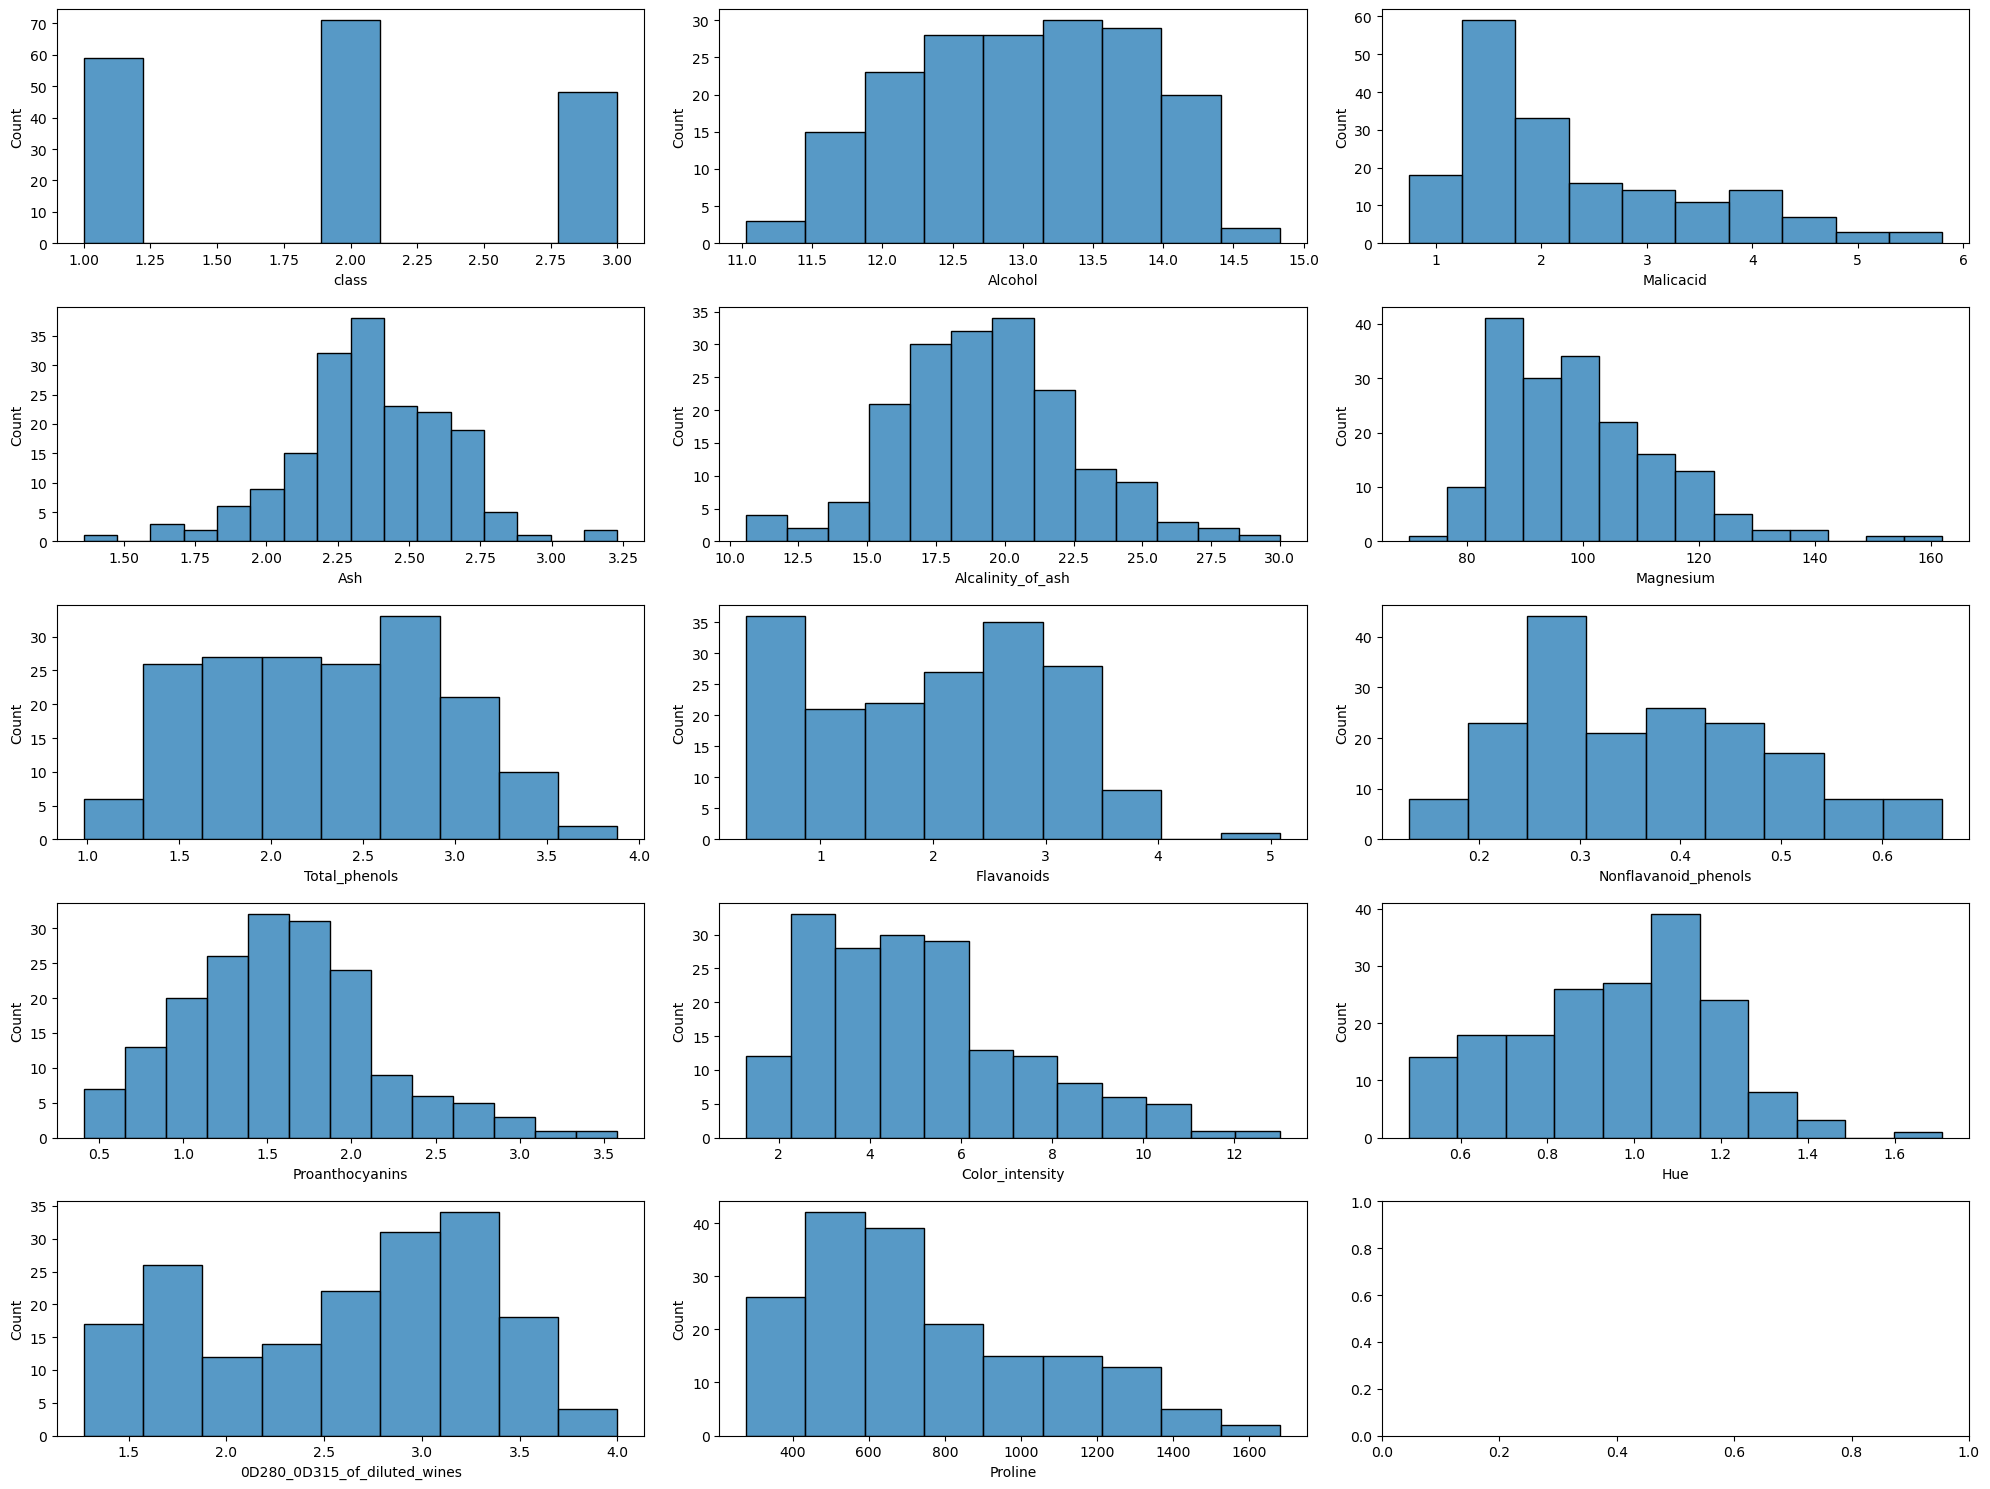

In [71]:
# Visualize distribution of unscaled data in each feature
col_names = wine.columns
plot_num = 1

plt.subplots(5,3, figsize=(20,15))

for col in wine:
    plt.subplot(5,3,plot_num)
    sns.histplot(wine[col])
    plot_num +=1

plt.tight_layout()
plt.show()

Most of the distribution of the data seems to be normalized. The graph also shows only 3 class of wine.

#### 2. Histogram

In [72]:
columns_plot = wine.columns

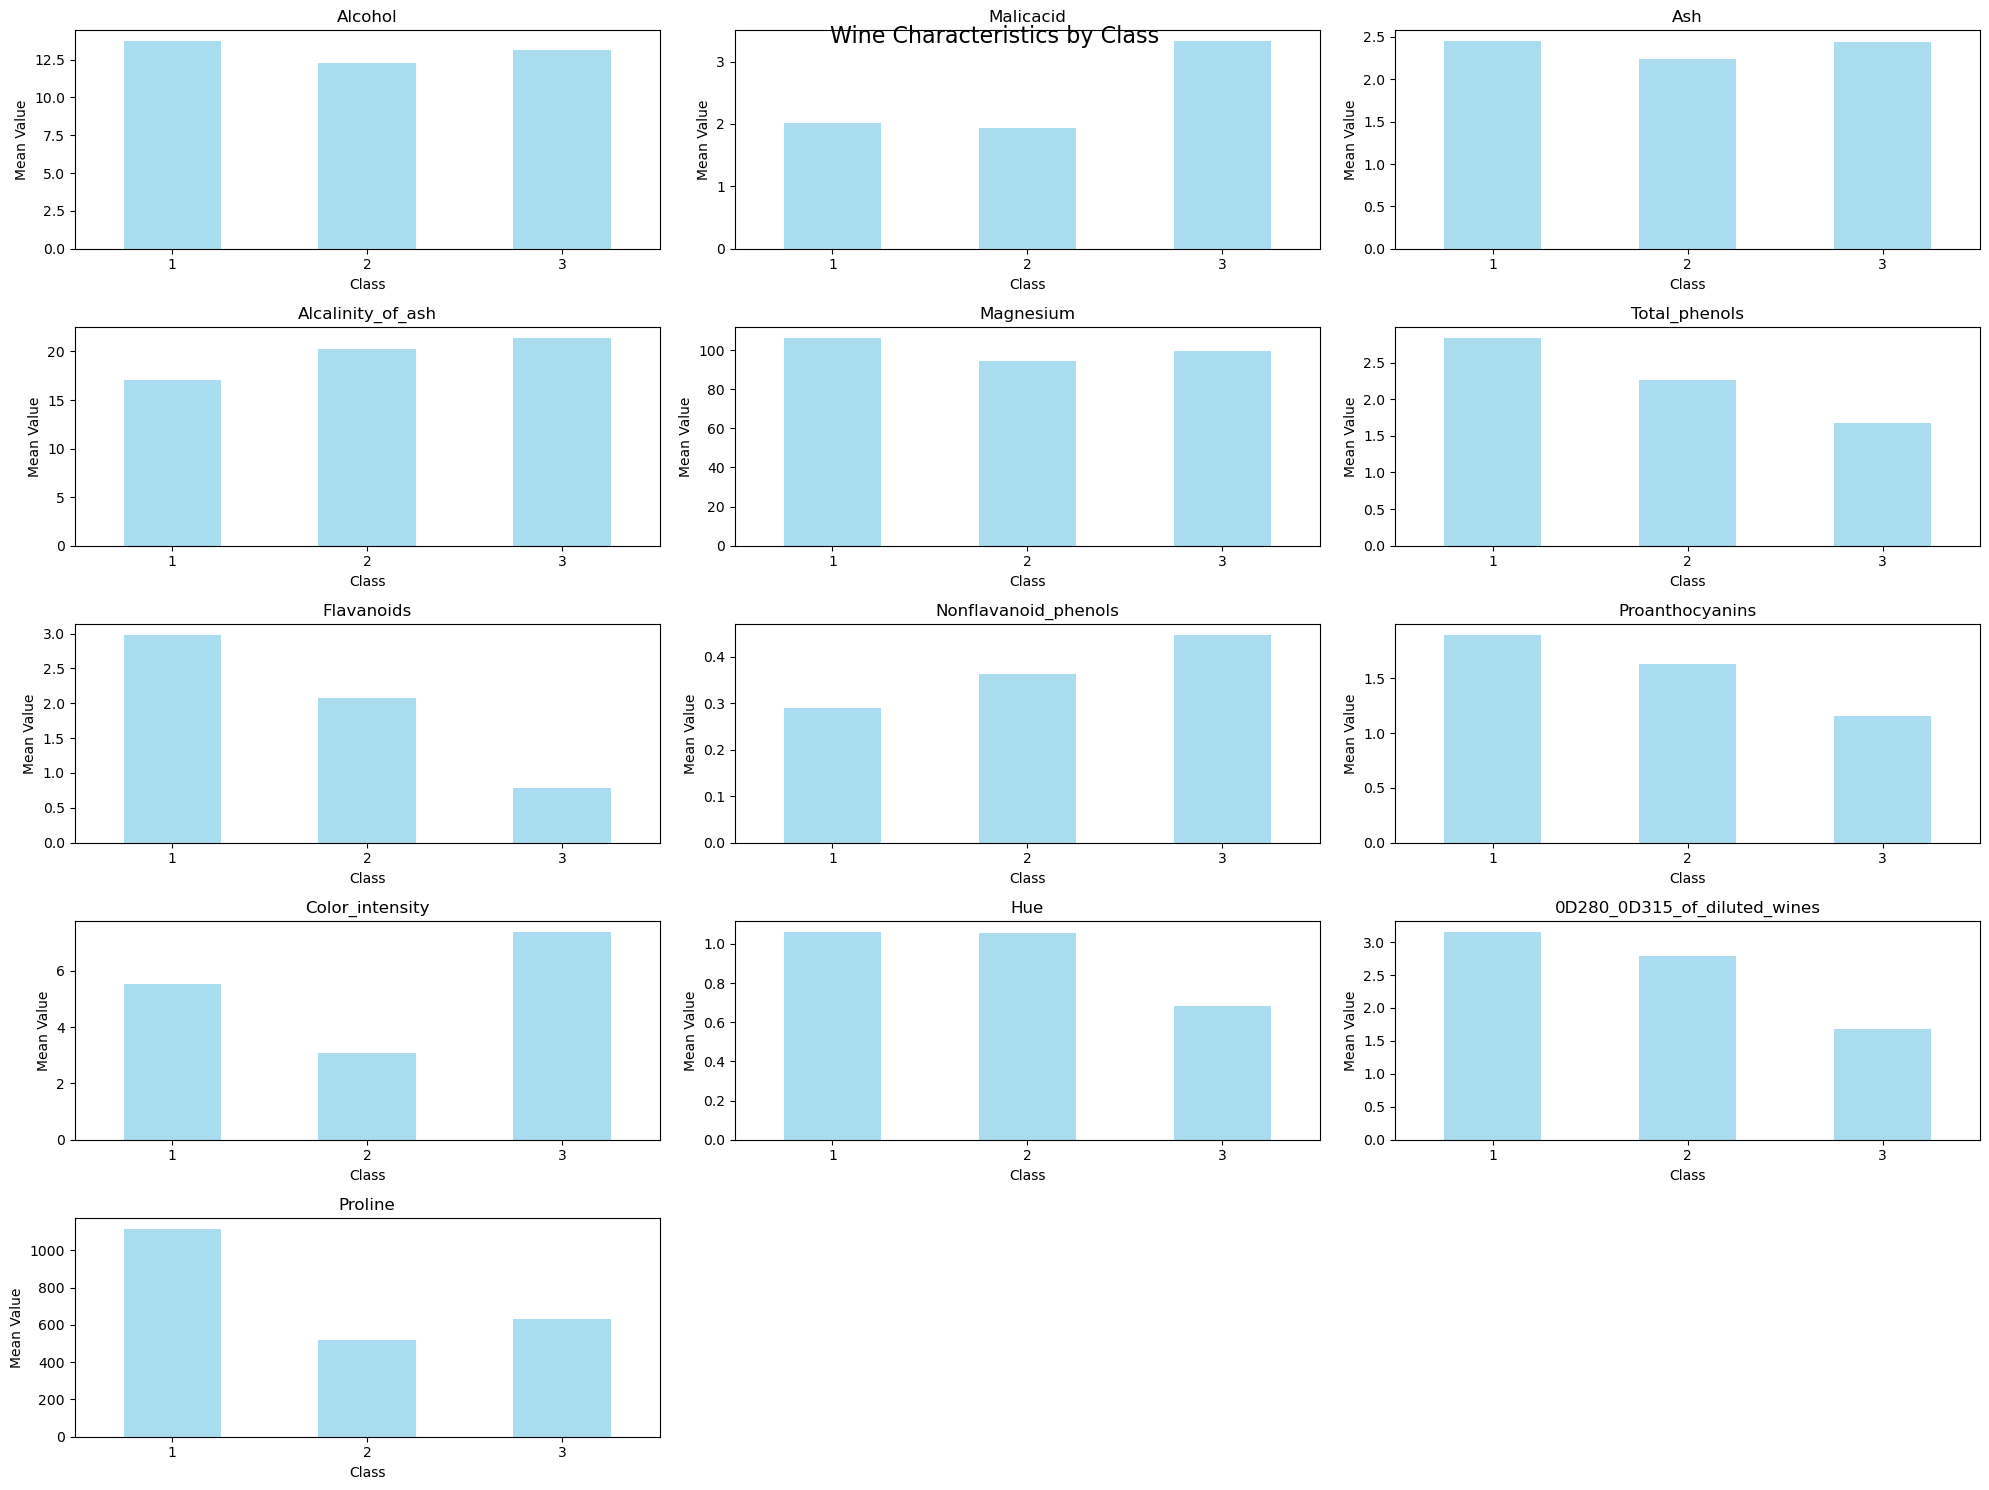

In [73]:

# Define the columns to plot (exclude 'class')
columns_to_plot = list(wine.columns)
columns_to_plot.remove('class')

# Plotting
plt.figure(figsize=(20,15))

# Loop through each column and create a grouped bar plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(5, 3, i+1)  # Adjust the subplot layout as needed
    wine.groupby('class')[col].mean().plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title(col)
    plt.xlabel('Class')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.suptitle('Wine Characteristics by Class', fontsize=16)
plt.show()

# Analyze this above

#### 3. Crorrelation between variables

Let's establish potential correlations between variables.

#### Heatmap

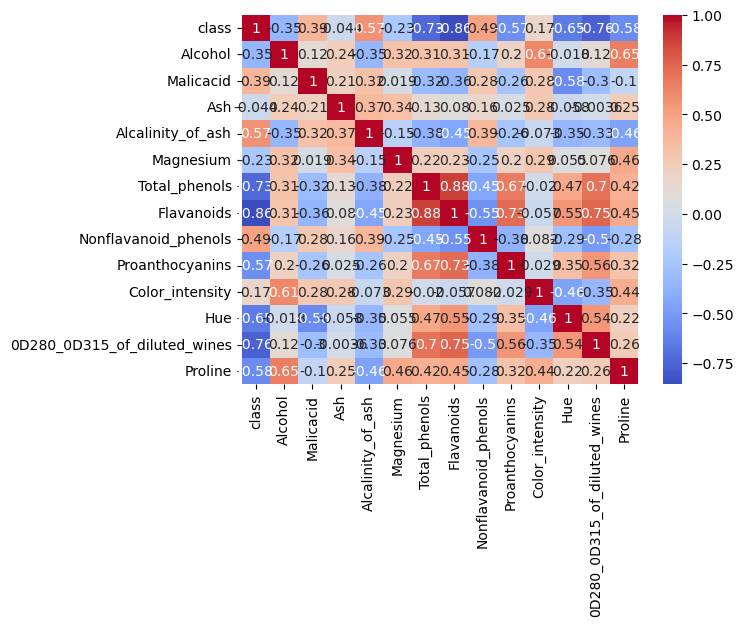

In [74]:
# Creating correlation matrix
cropcorre = wine.copy()

# Assuming cropcorre is your DataFrame
#categorical_columns = cropcorre.select_dtypes(include=['object']).columns.tolist()
numeric_columns = cropcorre.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in numeric_columns:
    cropcorre[column] = label_encoder.fit_transform(cropcorre[column])

# Plot the heatmap
sns.heatmap(cropcorre.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

# Analyze this above

#### Cross Correlation

# Analyze this above

### Part 2 - Pre-processing Data<a class="anchor" id="part-0"></a>

___

#### 1. Importing Packages

In [75]:
# hide warnings - we will be using default parameter values
import warnings
warnings.filterwarnings('ignore')

In [76]:
# Splitting data
from sklearn.model_selection import train_test_split 

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import time

#### 2. Defining target and independent variables

In [77]:
# Independent variable
X = wine.drop(['class'], axis=1)

# Dependent variable
y = wine['class']

# Checking
display(X)
print(y)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: class, Length: 178, dtype: int64


In [78]:
# Check the shapes
print("Subset dimensions:")
print (f'The shape of the dependent variable: {y.shape}')
print (f'The shape of the independent variables: {X.shape}')

Subset dimensions:
The shape of the dependent variable: (178,)
The shape of the independent variables: (178, 13)


In [79]:
# inspecting range of values for each
stats = wine.describe()
stats.loc[['min','max']]

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
min,1.0,11.03,0.74,1.36,10.6,70.0,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.0
max,3.0,14.83,5.80,3.23,30.0,162.0,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.0


Values are very wide between variables. The dataset needs to be scaled.

#### 3. Splitting Data

In [80]:
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(133, 13) (45, 13) (133,) (45,)


#### 4. Scalling Data

#### MinMaxScaler():
Keeps distribution, and scales your data to a range of [0,1]. It can perform better than the Standard Scaler when your features have non-normal distributions. It does not create distorting of the actual distribution, instead reduces the range to be between 0 and 1.

In [81]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the train data. Computes the min and max for each feature
scaler = scaler.fit(X_train) # do not scale target variable

# Fit the scaler and transform both data subsets
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)

X_train_mm_df=pd.DataFrame(X_train_mm)

#### Standard Scaler(): 

Works better with normal distributions, such as Linear/logistic regression. The standard scaler does distort relative distances slightly

In [82]:
# Initialize the Standard Scaler
scaler=StandardScaler()

# Fit the scaler to the train data. Computes the min and max for each feature
scaler=scaler.fit(X_train)

# Fit the scaler and transform both data subsets
X_train_ss=scaler.transform(X_train)
X_test_ss=scaler.transform(X_test)


X_train_ss_df=pd.DataFrame(X_train_ss)

#### Robust Scaler():
It is much more resilient to the presence of large amount of outliers in the original distribution.

In [83]:
# Initialize the MinMaxScaler
scaler=RobustScaler()

# Fit the scaler to the train data. Computes the min and max for each feature
scaler=scaler.fit(X_train)

# Fit the scaler and transform both data subsets
X_train_rob=scaler.transform(X_train)
X_test_rob=scaler.transform(X_test)

X_train_rob_df=pd.DataFrame(X_train_rob)

### Part 3 - Training Models<a class="anchor" id="part-0"></a>

___

#### 1. Logistic Regression

#### Fitting Logistic Regression model to MinMaxScaler() scaled data

- Checking running time

In [84]:
start = time.time()

# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Empty lists to append train and test accuracy scores to
train_acc_mm = []
test_acc_mm = []

# Loop through the different C values
for C in C_values:

    # Instantiate the model, increase max_iter to 1000
    logit = LogisticRegression(C = C, max_iter = 1000, random_state = 42)

    # Fit the model
    logit.fit(X_train_mm, y_train)

    # Score the model
    train_acc_mm.append(logit.score(X_train_mm,y_train))
    test_acc_mm.append(logit.score(X_test_mm, y_test))

stop = time.time()
runtime_logit_mm = stop-start
print(f"Runtime: {round(runtime_logit_mm,2)} seconds")

Runtime: 0.06 seconds


A very fast process.

- Accuracy scores for the different **C** values:

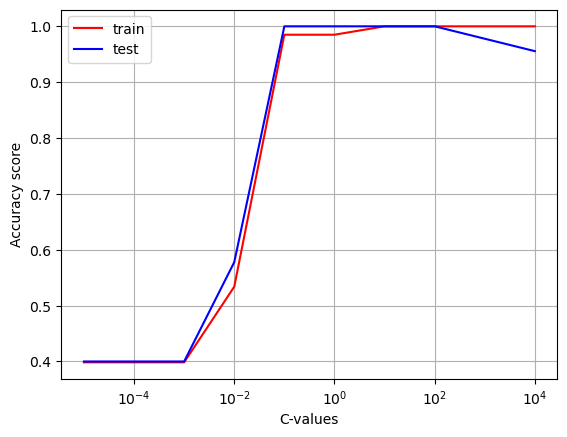

In [85]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.xscale('log')

# Labels
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid(True)
plt.show()

The best value for **C** based on the graphic above is 0.1 (10<sup>-1</sup>) because the plot level at this point, and the train and test accuracy scores are closest.

- Accuracy Tests

In [86]:
# Getting our best Logistic Regression
# Instantiate the model
logit_mm = LogisticRegression(C = 0.1, max_iter = 1000, random_state = 42)

# Fit the model
logit_mm.fit(X_train_mm, y_train)

# Store accuracy scores
logit_mm_train = logit_mm.score(X_train_mm, y_train)
logit_mm_test = logit_mm.score(X_test_mm, y_test)

# Score the model
print(f"Train Accuracy: {logit_mm_train}")
print(f"Test Accuracy: {logit_mm_test}")

Train Accuracy: 0.9849624060150376
Test Accuracy: 1.0


Based on the score analysis this model is performing exceptionally well despite the high train accuracy because there is a very small gap between the training and the test accuracies. This suggest a low risk of overfitting.

A value of 0.98 in training accuracy means that the model learned the training data effectively. While a test accuracy of 1 means that the model predicted well all instances in the test dataset.

- Pipeline and Cross Validation

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

estimators = [
    ('scaler',MinMaxScaler()),
    ('model', LogisticRegression(C=0.1))
]

my_pipe = Pipeline(estimators)

In [88]:
# Perform cross-validation
cv_scores = cross_val_score(my_pipe, X_train, y_train, cv=5) #cv=5 is a commonly used technique providing good estimates. Each fold contains 20% of the dataset.

# Compute the average validation score
avg_val_score = np.mean(cv_scores)

print("Avg cross-validation score for Logistic Regression with MinMax Scaled Data:", avg_val_score)

# Print the cross-validation scores
print("Cross-validation scores:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")


Avg cross-validation score for Logistic Regression with MinMax Scaled Data: 0.9623931623931623
Cross-validation scores:
Fold 1: 1.0000
Fold 2: 1.0000
Fold 3: 0.8889
Fold 4: 0.9615
Fold 5: 0.9615


In general this model performed really well at generalizing to new and unseen data, and on each of the 5 folders.

In [89]:
scores_df=pd.DataFrame(columns=['model','scaler','train','test'])

scores_df.loc[scores_df.shape[0],:]=['Logistic','MinMaxScaler',logit_mm_train,logit_mm_test]
scores_df

,model,scaler,train,test
0,Logistic,MinMaxScaler,0.984962,1.0


#### Fitting Logistic Regression model to StandarScaler() scaled data

- Checking running time

In [90]:
start = time.time()

# Empty lists to append the training and test accuracy scores to
train_acc_ss = []
test_acc_ss = []

# Loop through the same C values
for C in C_values:

    # Instantiate the model
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train_ss, y_train)

    # Score the model
    train_acc_ss.append(logit.score(X_train_ss, y_train))
    test_acc_ss.append(logit.score(X_test_ss, y_test))

stop = time.time()
runtime_logit_ss = stop-start
print(f"Runtime: {round(runtime_logit_ss,2)} seconds")

Runtime: 0.07 seconds


- Accuracy scores for the different **C** values:

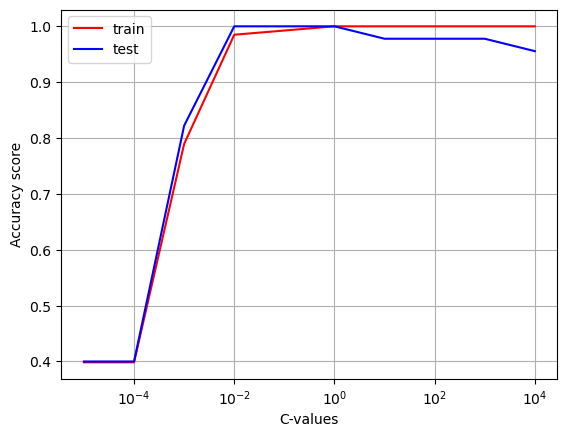

In [91]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')

# Labels
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid(True)
plt.show()

The best value for **C** based on the graphic above is 0.01 (10<sup>-2</sup>) because the plot level at this point, and the train and test accuracy scores are closest. However, the test accuracy is once again higher than the train accuracy. Let's score them as well.


- Accuracy Tests

In [92]:
# Getting our best Logistic Regression
# Instantiate the model
logit_ss = LogisticRegression(C = 0.1, max_iter = 1000, random_state = 42)

# Fit the model
logit_ss.fit(X_train_ss, y_train)

# Store accuracy scores
logit_ss_train = logit_ss.score(X_train_ss, y_train)
logit_ss_test = logit_ss.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {logit_ss_train}")
print(f"Test Accuracy: {logit_ss_test}")

Train Accuracy: 0.9924812030075187
Test Accuracy: 1.0


Fitting the Logistic Regression model to standarized data had a slightly better scores than using the MinMaxScaler(). The model achieved high accuracy both on the training data (99.24%) and the test accuracy (100%). This suggest that the model effectively learned from the training data to generalize on the new unseen data (test data).

- Pipeline and Cross Validation

In [93]:
estimators = [
    ('scaler',StandardScaler()),
    ('model', LogisticRegression(C=0.01))
]

my_pipe = Pipeline(estimators)

In [94]:
# Perform cross-validation
cv_scores = cross_val_score(my_pipe, X_train, y_train, cv=5) #cv=5 is a commonly used technique providing good estimates. Each fold contains 20% of the dataset.

# Compute the average validation score
avg_val_score = np.mean(cv_scores)

print("Avg cross-validation score for Logistic Regression with Standardized Data:", avg_val_score)

# Print the cross-validation scores
print("Cross-validation scores:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

Avg cross-validation score for Logistic Regression with Standardized Data: 0.9698005698005698
Cross-validation scores:
Fold 1: 1.0000
Fold 2: 0.9630
Fold 3: 0.9630
Fold 4: 0.9615
Fold 5: 0.9615


In [95]:
scores_df.loc[scores_df.shape[0],:]=['Logistic','Standard',logit_ss_train,logit_ss_test]
scores_df

,model,scaler,train,test
0,Logistic,MinMaxScaler,0.984962,1.0
1,Logistic,Standard,0.992481,1.0


This Model performed slightly better than using MinMaxScaler().


#### Fitting Logistic Regression model to RobustScaler() scaled data

- Checking for running time

In [96]:
start = time.time()

# Empty lists to append the training and test accuracy scores to
train_acc_rob = []
test_acc_rob = []

# Loop through the same C values
for C in C_values:

    # Instantiate the model
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train_rob, y_train)

    # Score the model
    train_acc_rob.append(logit.score(X_train_rob, y_train))
    test_acc_rob.append(logit.score(X_test_rob, y_test))

stop = time.time()
runtime_logit_rob = stop-start
print(f"Runtime: {round(runtime_logit_rob,2)} seconds")

Runtime: 0.07 seconds


- Accuracy scores for the different **C** values:
    

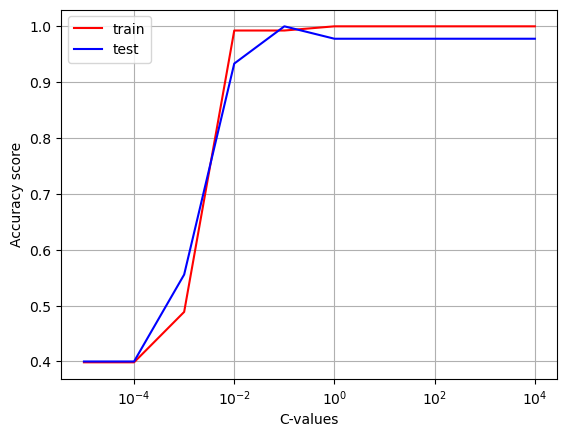

In [97]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_rob, c='red', label='train')
plt.plot(C_values, test_acc_rob, c='blue', label='test')
plt.xscale('log')

# Labels
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid(True)
plt.show()

The best value for **C** based on the graphic above is 1 (10<sup>0</sup>) because the plot level at this point.

- Accuracy Tests

In [98]:
# Getting our best Logistic Regression
# Instantiate the model
logit_rob = LogisticRegression(C = 1, max_iter = 1000, random_state = 42)

# Fit the model
logit_rob.fit(X_train_rob, y_train)

# Store accuracy scores
logit_rob_train = logit_rob.score(X_train_rob, y_train)
logit_rob_test = logit_rob.score(X_test_rob, y_test)

# Score the model
print(f"Train Accuracy: {logit_rob_train}")
print(f"Test Accuracy: {logit_rob_test}")

Train Accuracy: 1.0
Test Accuracy: 0.9777777777777777


explain

- Pipeline and Cross Validation

In [99]:
estimators = [
    ('scaler',StandardScaler()),
    ('model', LogisticRegression(C=1))
]

my_pipe = Pipeline(estimators)

In [100]:
# Perform cross-validation
cv_scores = cross_val_score(my_pipe, X_train, y_train, cv=5) #cv=5 is a commonly used technique providing good estimates. Each fold contains 20% of the dataset.

# Compute the average validation score
avg_val_score = np.mean(cv_scores)

print("Avg cross-validation score for Logistic Regression with Standardized Data:", avg_val_score)

# Print the cross-validation scores
print("Cross-validation scores:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

Avg cross-validation score for Logistic Regression with Standardized Data: 0.9849002849002849
Cross-validation scores:
Fold 1: 1.0000
Fold 2: 1.0000
Fold 3: 0.9630
Fold 4: 1.0000
Fold 5: 0.9615


In [101]:
scores_df.loc[scores_df.shape[0],:]=['Logistic','Robust',logit_rob_train,logit_rob_test]
scores_df

,model,scaler,train,test
0,Logistic,MinMaxScaler,0.984962,1.0
1,Logistic,Standard,0.992481,1.0
2,Logistic,Robust,1.0,0.977778


In [102]:
scores_df.loc[scores_df.shape[0],:]=['-----']
scores_df

,model,scaler,train,test
0,Logistic,MinMaxScaler,0.984962,1.0
1,Logistic,Standard,0.992481,1.0
2,Logistic,Robust,1.0,0.977778
3,-----,-----,-----,-----


Using RobustScaler() generated a slightly higher training accuracy than the test accuracy. This could mean overfitting.

In conclusion, MinMaxScaler and StandardScaler have similar test accuracies, but StandardScaler has a slightly higher training accuracy. This suggests that StandardScaler may have learned the training data's patterns slightly better than MinMaxScaler.

On the other hand, RobustScaler has the highest training accuracy but a slightly lower test accuracy compared to MinMaxScaler and StandardScaler. This suggests that while RobustScaler may fit the training data very well, it may not generalize as effectively to unseen data as the other two scalers.

Based on these observations, the choice is between MinMaxScaler and StandardScaler, and it will decide in this case based on computational efficiency. MinMaxScaler had a run time of 0.16 second, so that Logistic Regression on MinMax scaled data was the one with best performance.

#### 2. K Nearest Neighbor

#### Fitting KNN model to normalized data with MinMaxScaler()

- Checking running time

In [103]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50)

# Empty lists to append the accuracies to
train_acc_mm = []
test_acc_mm = []

# Loop through neighbors
for K in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=K)

    # Fit the model
    knn.fit(X_train_mm, y_train)

    # Score the model
    train_acc_mm.append(knn.score(X_train_mm, y_train))
    test_acc_mm.append(knn.score(X_test_mm, y_test))

stop = time.time()
runtime_knn_mm = stop-start
print(f"Runtime: {round(runtime_knn_mm,2)} seconds")

Runtime: 0.58 seconds


- Accuracy

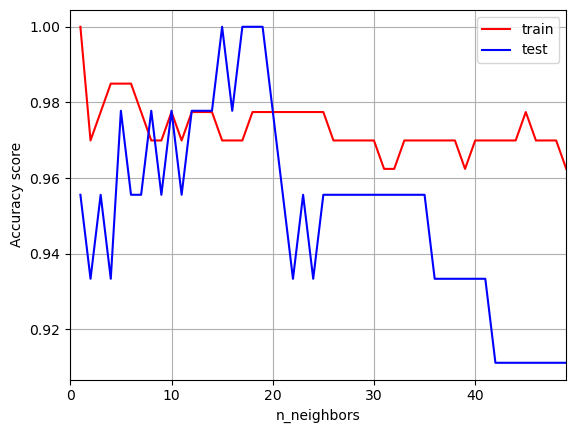

In [104]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_mm, c='red', label='train')
plt.plot(neighbors, test_acc_mm, c='blue', label='test')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.grid(True)
plt.legend()
plt.xlim(0, max(neighbors))  # Adjust the x-axis limits
plt.show()

This model shows overfitting with values of K between 0 and 5, and 35 and 49. The highest accuracy for training and test data without overfitting is when values of k = 47.

**Checking Accuracy with k = 47**

In [105]:
# KNN that performed best on scaled data
# Instantiate the model
knn_mm = KNeighborsClassifier(n_neighbors=47)

# Fit the model
knn_mm.fit(X_train_mm, y_train)

# Store accuracy scores
knn_mm_train = knn_mm.score(X_train_mm, y_train)
knn_mm_test = knn_mm.score(X_test_mm, y_test)

# Score the model
print(f"Train Accuracy: {knn_mm_train}")
print(f"Test Accuracy: {knn_mm_test}")

Train Accuracy: 0.9699248120300752
Test Accuracy: 0.9111111111111111


In [106]:
scores_df.loc[scores_df.shape[0],:]=['KNN','MinMax',knn_mm_train,knn_mm_test]
scores_df

,model,scaler,train,test
0,Logistic,MinMaxScaler,0.984962,1.0
1,Logistic,Standard,0.992481,1.0
2,Logistic,Robust,1.0,0.977778
3,-----,-----,-----,-----
4,KNN,MinMax,0.969925,0.911111


#### Fitting KNN model to normalized data with StandardScaler()

- Checking running time

In [107]:
start = time.time()

# Empty lists to append to
train_acc_ss = []
test_acc_ss = []

# Loop through the neighbors
for k in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train_ss, y_train)

    # Score the model
    train_acc_ss.append(knn.score(X_train_ss, y_train))
    test_acc_ss.append(knn.score(X_test_ss, y_test))

stop = time.time()
runtime_knn_ss = stop-start
print(f"Runtime: {round(runtime_knn_ss,2)} seconds")

Runtime: 0.58 seconds


- Accuracy

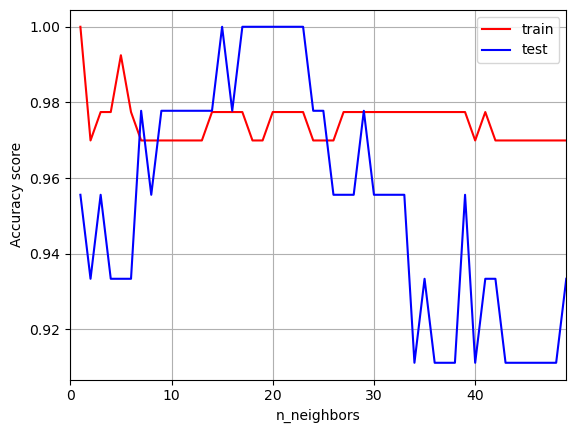

In [108]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_ss, c='red', label='train')
plt.plot(neighbors, test_acc_ss, c='blue', label='test')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.grid(True)
plt.xlim(0, max(neighbors))  # Adjust the x-axis limits
plt.show()

In [109]:
# Fit the model
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [110]:
def PlotBoundaries(model, X, Y, plotsize=(6,4)) :
    '''
    Helper function that plots the decision boundaries of a model and data (X,Y)
    code modified from: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    '''
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1,X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=plotsize)
    plt.contourf(xx, yy, Z, alpha=0.4)

    #Plot
    plt.scatter(X[:, 0], X[:, 1], c=Y,s=20, edgecolor='k')
    plt.show()

#### Accuracy of the model

In [111]:
scores_df.loc[scores_df.shape[0],:]=['KNN','Robust',knn_mm_train,knn_mm_test]
scores_df

,model,scaler,train,test
0,Logistic,MinMaxScaler,0.984962,1.0
1,Logistic,Standard,0.992481,1.0
2,Logistic,Robust,1.0,0.977778
3,-----,-----,-----,-----
4,KNN,MinMax,0.969925,0.911111
5,KNN,Robust,0.969925,0.911111


#### 3. Random Forest